In [1]:
!pip install matplotlib==3.7.1

  Using cached contourpy-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 154.9 kB/s eta 0:00:00m eta 0:00:010:00:02
Using cached contourpy-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (326 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Using cached 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Olympics-Data.csv')
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [3]:
gold_medals = data.groupby('Country').agg(
    {
        'Medal': lambda x: (x == 'Gold').sum()
    }
)
top_10 = gold_medals.nlargest(10, 'Medal')
top_10

,Medal
Country,
USA,2235
URS,838
GBR,546
ITA,476
GER,452
HUN,412
FRA,408
SWE,349
GDR,329


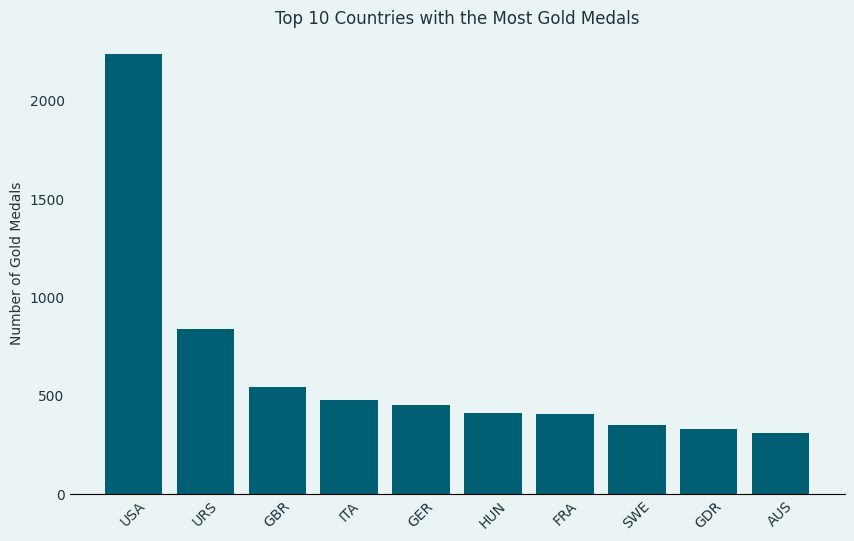

In [4]:
fig_top10 , ax_top10 = plt.subplots(figsize=(10, 6), facecolor='#EAF4f4')
x =  top_10.index
y = top_10['Medal']
ax_top10.bar(x, y, color='#005f73')
ax_top10.set_facecolor('#EAF4f4')
ax_top10.spines[['top', 'right', 'left']].set_visible(False)
ax_top10.set_ylabel('Number of Gold Medals', fontsize=10, color='#22333b')
ax_top10.set_title('Top 10 Countries with the Most Gold Medals', fontsize=12, color='#22333b')
ax_top10.tick_params(length=0, colors='#22333b')
ax_top10.tick_params('x', rotation=45, colors='#22333b')
plt.show()

In [5]:
genders = data.groupby(['Year', 'Gender']).size().unstack(level=1)
genders

Gender,Men,Women
Year,,
1896,151.0,NaN
1900,501.0,11.0
1904,458.0,12.0
1908,789.0,15.0
1912,855.0,30.0
1920,1255.0,43.0
1924,833.0,51.0
1928,615.0,95.0
1932,555.0,60.0


In [6]:
genders.fillna(0, inplace=True)

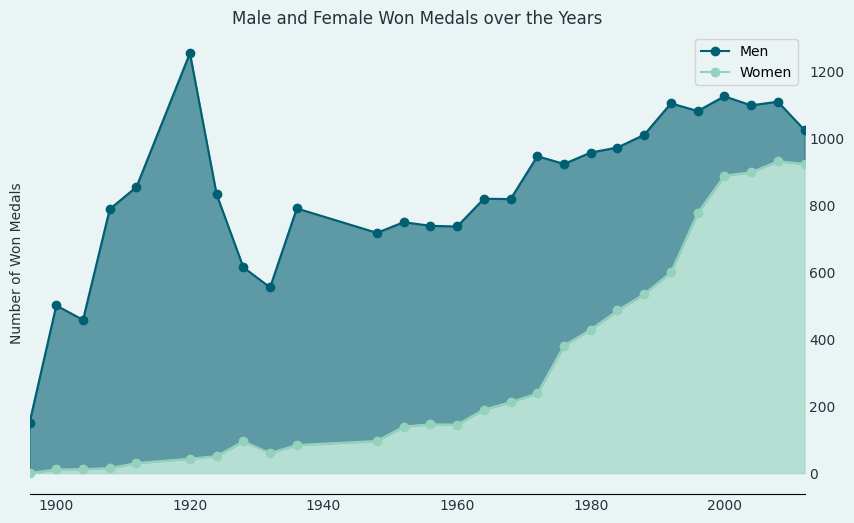

In [7]:
fig_gen , ax_gen = plt.subplots(figsize=(10, 6), facecolor=('#EAF4f4'))
ax_gen.set_facecolor('#EAF4f4')
x = genders.index.to_list()
men = genders['Men']
women = genders['Women']
ax_gen.plot(x, men, marker='o', color='#005f73')
ax_gen.plot(x, women, marker='o', color='#94d2bd')
ax_gen.legend(['Men', 'Women'] ,facecolor='#EAF4f4')
ax_gen.fill_between(x, women, men, color='#005f73', alpha=0.6) # area between men and women
ax_gen.fill_between(x, women, color='#94d2bd', alpha=0.6) # area between women and x-axis
ax_gen.spines[['top', 'right', 'left']].set_visible(False)
ax_gen.yaxis.tick_right()
ax_gen.tick_params(length=0, colors='#22333b')
ax_gen.set_ylabel('Number of Won Medals', fontsize=10, color='#22333b')
ax_gen.set_title('Male and Female Won Medals over the Years', fontsize=12, color='#22333b')
plt.xlim((1896, 2012))
plt.show()

In [13]:
svk = data[data['Country'] == 'SVK'].groupby('Sport').size()
svk

Sport
Aquatics          2
Canoe             3
Canoe / Kayak    22
Judo              1
Shooting          5
Wrestling         1
dtype: int64

In [19]:
svk_medals = data[data['Country'] == 'SVK'].groupby(['Sport', 'Medal']).size()
svk_medals

Sport          Medal 
Aquatics       Silver     2
Canoe          Bronze     3
Canoe / Kayak  Bronze     5
               Gold      10
               Silver     7
Judo           Silver     1
Shooting       Bronze     3
               Silver     2
Wrestling      Bronze     1
dtype: int64

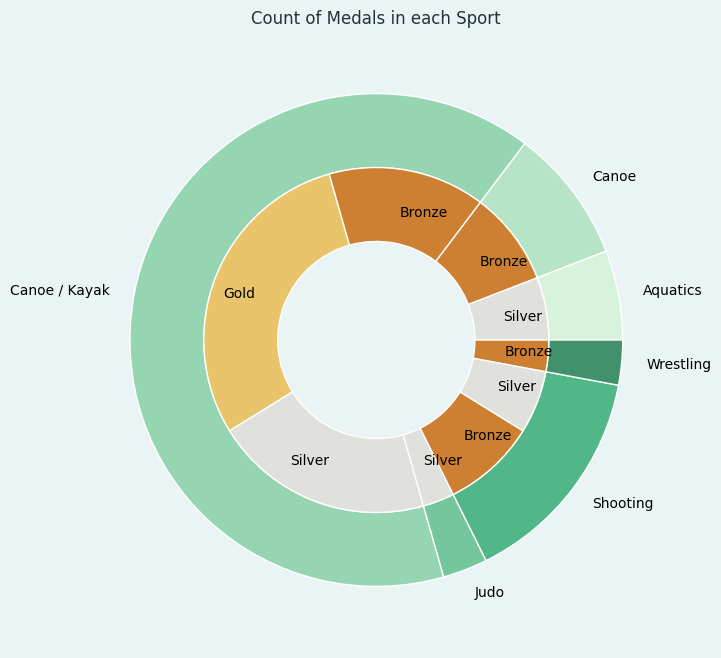

In [22]:
fig_SVK, ax_SVK = plt.subplots(figsize=(10, 8), facecolor='#EAF4f4')
ax_SVK.set_facecolor('#EAF4f4')
wedge_colors = ['#d8f3dc', '#b7e4c7', '#95d5b2','#74c69d','#52b788','#40916c']
ax_SVK.pie(svk, radius=1, colors=wedge_colors,
           labels=svk.index,
           wedgeprops=dict(width=0.3, edgecolor='w'))
inner_colors = {'Gold': '#E9C46A', 'Silver': '#E0E1DD', 'Bronze': '#CD7F32'}
ax_SVK.pie(svk_medals.values, radius=0.7,
           colors=list(map(inner_colors.get, [x[1] for x in svk_medals.index.to_list()])),
           labels=[x[1] for x in svk_medals.index.to_list()],
           labeldistance=0.75, 
           wedgeprops=dict(width=0.3, edgecolor='w'))
ax_SVK.set_title('Count of Medals in each Sport', fontsize=12, color='#22333b')
plt.show()

In [ ]:
import zlib
import zipfile
import joblib

joblib.dump(fig_gen, "fig_gen")
joblib.dump(fig_top10, "fig_top10")
joblib.dump(fig_SVK, "fig_SVK")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["fig_gen", "fig_top10", "fig_SVK", "Olympic.ipynb"]
compress(file_names)